# Volcano plots

In [1]:
# %%%%%%%% imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plot_misc import volcano
import plot_misc.example_data.examples as examples
%matplotlib inline
from IPython.core.display import display

/home/amand/google_drive/Research/plot-misc/plot_misc/table/layout.py:24: FutureWarning: The `layout.py` module will be moved to the `data-clean` package in the near future.
  FutureWarning)


In [2]:
# load data
data = examples.load_volcano_data()
data.head()

phenotype        point           se    pvalue  \
exposure                                                                  
13472_35_3_HDHD2       P-wave force -4931.106973  1899.108629  0.009417   
10772_21_3_CSGALNACT2  P-wave force  -276.968492    82.984159  0.000845   
13242_134_3_SHANK3     P-wave force  -235.351339    88.982756  0.008171   
5012_67_1_AK1          P-wave force          NaN          NaN       NaN   
9335_28_3_PSG9         P-wave force  -402.545894   195.034845  0.039021   

                       multiple_testing_threshold  pvalue_log10  
exposure                                                         
13472_35_3_HDHD2                         0.000005      2.026094  
10772_21_3_CSGALNACT2                    0.000005      3.073127  
13242_134_3_SHANK3                       0.000005      2.087710  
5012_67_1_AK1                            0.000005           NaN  
9335_28_3_PSG9                           0.000005      1.408706

In [3]:
# constants
CMTOINCH = 1/2.54
# The y, x axes labels,title, point size, text size,
# ytick size, x ticks size
ANNOT_SIZE = [6.0, 6.0, 10.0, 15.0, 3.4, 14.0, 14.0]
# using standard colours
COLOURS = ('orangered','dimgrey','lightcoral')
# setting size (in cm)
FIG_SIZE = [float(r) * CMTOINCH for r in  [4.5,5.5]]
# setting threshold
SIGNIFICANCE = data['multiple_testing_threshold'].unique()[0]
YLIM = [0, 22] # adding some space to the top
XLIM = [-800,800]
# Title
TITLE = str(data['phenotype'].unique()[0])
TL = 3

## plotting volcano


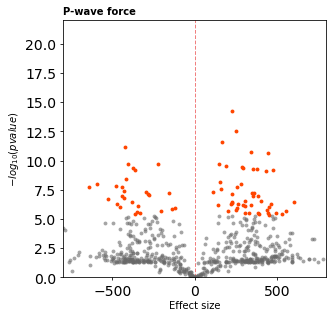

In [4]:
# making subplots
fig, ax = plt.subplots(1, 1, figsize=(12 * CMTOINCH, 12 * CMTOINCH))
# make sure to set the xlim before plotting 
ax.set_xlim(XLIM)
# title
_, _ = volcano.plot_volcano(data,y_column='pvalue_log10',
                                x_column='point',
                                ylim = YLIM,
                                col=COLOURS,
                                msize=ANNOT_SIZE[3],
                                alpha=SIGNIFICANCE,
                                xlab='Effect size', ylab=r'$-log_{10}(pvalue)$',
                                ax=ax,
                                )
# add title
ax.set_title(TITLE, loc='left', y=1.00, fontsize=ANNOT_SIZE[2],
             fontdict={'fontweight': 'bold'})
ax.xaxis.labelpad = 2
ax.tick_params(axis='y', labelsize=ANNOT_SIZE[5], length=TL)
ax.tick_params(axis='x', labelsize=ANNOT_SIZE[6], length=TL)



## Annotating labels

In [5]:
data['label'] = np.nan
data.loc['9316_67_3_WFDC1',  'label'] = ['WFDC1']
index = ['9316_67_3_WFDC1']
data.iloc[10:16,]

phenotype       point         se        pvalue  \
exposure                                                               
6077_63_3_CECR1    P-wave force  101.620825  48.731654  3.704076e-02   
9282_12_3_CRISP2   P-wave force -220.303910  34.565643  1.847700e-10   
3212_30_3_ASAH2    P-wave force  140.370108  28.140184  6.093052e-07   
13954_9_3_GNPNAT1  P-wave force         NaN        NaN           NaN   
6576_1_3_ART4      P-wave force  221.879569  67.828538  1.070985e-03   
9316_67_3_WFDC1    P-wave force  442.297259  66.154470  2.296252e-11   

                   multiple_testing_threshold  pvalue_log10  label  
exposure                                                            
6077_63_3_CECR1                      0.000005      1.431320    NaN  
9282_12_3_CRISP2                     0.000005      9.733369    NaN  
3212_30_3_ASAH2                      0.000005      6.215165    NaN  
13954_9_3_GNPNAT1                    0.000005           NaN    NaN  
6576_1_3_ART4                        0.000005      2.970216    NaN  
9316_67_3_WFDC1                      0.000005     10.638980  WFDC1

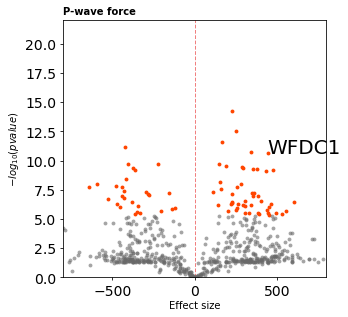

In [6]:
# making subplots
fig, ax = plt.subplots(1, 1, figsize=(12 * CMTOINCH, 12 * CMTOINCH))
# make sure to set the xlim before plotting 
ax.set_xlim(XLIM)
# title
_, _ = volcano.plot_volcano(data,y_column='pvalue_log10',
                                x_column='point',
                                ylim = YLIM,
                                col=COLOURS,
                                msize=ANNOT_SIZE[3],
                                alpha=SIGNIFICANCE,
                                xlab='Effect size', ylab=r'$-log_{10}(pvalue)$',
                                ax=ax,
                                # THIS IS NEW!
                                point_label='label',
                                index_label=index,
                                lsize=20,
                                )
# add title
ax.set_title(TITLE, loc='left', y=1.00, fontsize=ANNOT_SIZE[2],
             fontdict={'fontweight': 'bold'})
ax.xaxis.labelpad = 2
ax.tick_params(axis='y', labelsize=ANNOT_SIZE[5], length=TL)
ax.tick_params(axis='x', labelsize=ANNOT_SIZE[6], length=TL)

In [7]:
help(volcano)

Help on module plot_misc.volcano in plot_misc:

NAME
    plot_misc.volcano - Provide a function to draw and annotate volcano plots.

DESCRIPTION
    Label overlap is addressed by sourcing `adjustText`.

FUNCTIONS
    plot_volcano(data: pandas.core.frame.DataFrame, y_column: str, x_column: str, point_label: Union[str, NoneType] = None, legend: bool = False, fsize: Union[Tuple[float, float], NoneType] = None, adjust: bool = False, lim: float = 1000, alpha: float = 1e-05, col: Tuple[str, str, str] = ('orangered', 'dimgrey', 'lightcoral'), xlab: str = 'Point estimate', ylab: str = '$-log_{10}(pvalue)$', ylim: Union[List[float], NoneType] = None, msize: float = 10, lsize: float = 5, transparency_ns: float = 0.6, index_label: Union[List[str], NoneType] = None, ax: Union[matplotlib.axes._axes.Axes, NoneType] = None, label_kwargs_dict: Dict[Any, Any] = {}, scatter_sig_kwargs_dict: Dict[Any, Any] = {}, scatter_nonsig_kwargs_dict: Dict[Any, Any] = {})
        Creates a volcano plots, where signi